In [11]:
dataset = None
dataset_dict = {}
# dataset_dict['MNIST'] = dataset
# dataset_dict['CIPHAR'] = dataset
# dataset_dict['Synthetic1'] = dataset
dataset_dict['Synthetic2'] = dataset

kernel_dict = {}
kernel_dict["Gaussian"] = None

noise_list = [0, 1, 10]


In [12]:
import glob
files = glob.glob("../output/figure234*.txt")
files.sort()

filename = files[-1]

trainers = eval(open(filename, 'r').read())
# trainers = eval("{'D:Synthetic2 K:Gaussian S:400 N:0': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 400, 'noise': 0, 'sgd_ce': 0.18069999999999997, 'iterations': 10, 'inv_ce': 0.2017, 'inv_norm': 36.55096494386032, 'sgd_norm': 17.42568761032765}, 'D:Synthetic2 K:Gaussian S:400 N:10': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 400, 'noise': 10, 'sgd_ce': 0.23919999999999997, 'iterations': 15, 'inv_ce': 0.2565, 'inv_norm': 40.848323099877035, 'sgd_norm': 24.197493017087144}, 'D:Synthetic2 K:Gaussian S:1000 N:0': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 1000, 'noise': 0, 'sgd_ce': 0.1904, 'iterations': 18, 'inv_ce': 0.2188, 'inv_norm': 69.63820761608633, 'sgd_norm': 38.43857868767093}, 'D:Synthetic2 K:Gaussian S:1000 N:10': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 1000, 'noise': 10, 'sgd_ce': 0.23870000000000002, 'iterations': 24, 'inv_ce': 0.266, 'inv_norm': 75.86438829659387, 'sgd_norm': 48.18804686765084}, 'D:Synthetic2 K:Gaussian S:2000 N:0': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 2000, 'noise': 0, 'sgd_ce': 0.21009999999999995, 'iterations': 28, 'inv_ce': 0.2301, 'inv_norm': 121.84130212015424, 'sgd_norm': 69.09089159260047}, 'D:Synthetic2 K:Gaussian S:2000 N:10': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 2000, 'noise': 10, 'sgd_ce': 0.25329999999999997, 'iterations': 28, 'inv_ce': 0.2777, 'inv_norm': 133.27780678418188, 'sgd_norm': 76.17652246888369}, 'D:Synthetic2 K:Gaussian S:4000 N:0': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 4000, 'noise': 0, 'sgd_ce': 0.20850000000000002, 'iterations': 55, 'inv_ce': 0.2253, 'inv_norm': 220.8929331957413, 'sgd_norm': 144.33163385535127}, 'D:Synthetic2 K:Gaussian S:4000 N:10': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 4000, 'noise': 10, 'sgd_ce': 0.25660000000000005, 'iterations': 60, 'inv_ce': 0.2701, 'inv_norm': 242.42922765233007, 'sgd_norm': 165.93680861594189}, 'D:Synthetic2 K:Gaussian S:10000 N:0': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 10000, 'noise': 0, 'sgd_ce': 0.20009999999999994, 'iterations': 83, 'inv_ce': 0.2151, 'inv_norm': 440.1320509364595, 'sgd_norm': 302.44401632507225}, 'D:Synthetic2 K:Gaussian S:10000 N:10': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 10000, 'noise': 10, 'sgd_ce': 0.25870000000000004, 'iterations': 95, 'inv_ce': 0.2785, 'inv_norm': 484.74283620279044, 'sgd_norm': 353.780777240313}, 'D:Synthetic2 K:Gaussian S:15000 N:0': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 15000, 'noise': 0, 'sgd_ce': 0.20879999999999999, 'iterations': 999999, 'inv_ce': 0.2382, 'inv_norm': 605.1404337006154, 'sgd_norm': 403.63213540404274}, 'D:Synthetic2 K:Gaussian S:15000 N:10': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 15000, 'noise': 10, 'sgd_ce': 0.25749999999999995, 'iterations': 999999, 'inv_ce': 0.284, 'inv_norm': 667.9284513280552, 'sgd_norm': 448.22136209852897}, 'D:Synthetic2 K:Gaussian S:20000 N:0': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 20000, 'noise': 0, 'sgd_ce': 0.20820000000000005, 'iterations': 999999, 'inv_ce': 0.2471, 'inv_norm': 782.6046575443527, 'sgd_norm': 469.35763091502554}, 'D:Synthetic2 K:Gaussian S:20000 N:10': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 20000, 'noise': 10, 'sgd_ce': 0.26249999999999996, 'iterations': 999999, 'inv_ce': 0.2909, 'inv_norm': 852.8781893957756, 'sgd_norm': 516.9898157929904}, 'D:Synthetic2 K:Gaussian S:25000 N:0': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 25000, 'noise': 0, 'sgd_ce': 0.21540000000000004, 'iterations': 999999, 'sgd_norm': 519.7777106317171}, 'D:Synthetic2 K:Gaussian S:25000 N:10': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 25000, 'noise': 10, 'sgd_ce': 0.2632, 'iterations': 999999, 'sgd_norm': 575.7862490485079}, 'D:Synthetic2 K:Gaussian S:30000 N:0': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 30000, 'noise': 0, 'sgd_ce': 0.22299999999999998, 'iterations': 999999, 'sgd_norm': 564.9409422660585}, 'D:Synthetic2 K:Gaussian S:30000 N:10': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 30000, 'noise': 10, 'sgd_ce': 0.27390000000000003, 'iterations': 999999, 'sgd_norm': 622.9467258009477}, 'D:Synthetic2 K:Gaussian S:50000 N:0': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 50000, 'noise': 0, 'sgd_ce': 0.21150000000000002, 'iterations': 999999, 'sgd_norm': 694.8751662906651}, 'D:Synthetic2 K:Gaussian S:50000 N:10': {'dataset': 'Synthetic2', 'kernel': 'Gaussian', 'size': 50000, 'noise': 10, 'sgd_ce': 0.25560000000000005, 'iterations': 999999, 'sgd_norm': 771.7149549591832}}")



Synthetic2


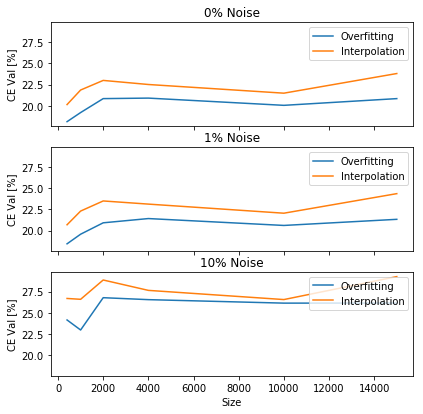

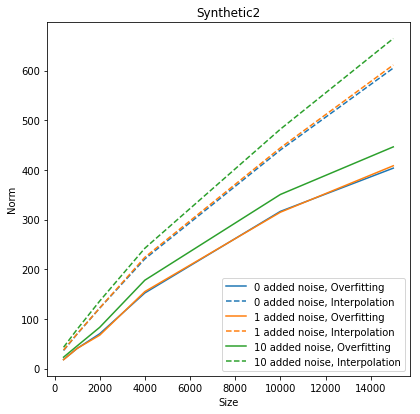

In [13]:
# Size vs Error

import matplotlib.pyplot as plt


this_kernel = 'Gaussian'

for this_dataset in dataset_dict.keys():
    
    print(this_dataset)
    
    
    fig, axs = plt.subplots(len(noise_list), sharey=True)
    fig.set_size_inches(6.5, 6.5)
        
    for index, this_noise in enumerate(noise_list):

        size = []
        inv = []
        sgd = []

        for name, trainer in trainers.items():  

            if trainer['dataset'] != this_dataset:
                continue

            if trainer['kernel'] != this_kernel:
                continue

            if trainer['noise'] != this_noise:
                continue

            sgd.append(trainer['sgd_ce'] * 100)
            if 'inv_ce' in trainer:
                inv.append(trainer['inv_ce'] * 100)
            size.append(trainer['size'])

            
        axs[index].plot(size, sgd, label='Overfitting') 
        axs[index].plot(size[:len(inv)], inv, label='Interpolation')    

        axs[index].set_title(str(this_noise) + '% Noise')
        axs[index].set_xlabel('Size')
        axs[index].set_ylabel('CE Val [%]')
        axs[index].legend(loc='upper right')
         
    for ax in fig.get_axes():
        ax.label_outer()
            
    import matplotlib2tikz
    filename = '../tikz/Figure234_' + this_dataset + '.tex'
    matplotlib2tikz.save(filename)        
    
    filename = '../png/Figure234_' + this_dataset + '.png'
    plt.savefig(filename)
    plt.show()  

    for ax in fig.get_axes():
        ax.label_outer()
        
    plt.figure(num=None, figsize=(6.5, 6.5))
    ax.set_prop_cycle(None)

    for this_noise in noise_list:

        size = []
        inv = []
        sgd = []

        for name, trainer in trainers.items():  

            if trainer['dataset'] != this_dataset:
                continue

            if trainer['kernel'] != this_kernel:
                continue

            if trainer['noise'] != this_noise:
                continue

            sgd.append(trainer['sgd_norm'])
            if 'inv_norm' in trainer:
                inv.append(trainer['inv_norm'])
            size.append(trainer['size'])

        color = next(ax._get_lines.prop_cycler)['color']
        plt.plot(size, sgd, label=str(this_noise) + ' added noise, Overfitting', color=color) 
        plt.plot(size[:len(inv)], inv, '--', label=str(this_noise) + ' added noise, Interpolation', color=color)    

    plt.title(this_dataset)
    plt.xlabel('Size')
    plt.ylabel('Norm')
    plt.legend(loc='lower right') 
        
    import matplotlib2tikz
    filename = '../tikz/Figure234_' + this_dataset + '_norm' + '.tex'
    matplotlib2tikz.save(filename)        

    filename = '../png/Figure234_' + this_dataset + '_norm' + '.png'
    plt.savefig(filename)
    plt.show()  

In [14]:
# del trainers